In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm as SVC,ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
plt.rcParams["figure.figsize"] = (20,10)
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import os

print(os.getcwd())  # Check your current working directory


c:\Users\Sakshi\OneDrive\Desktop\vrutti\server


In [4]:
import pandas as pd

try:
    # Step 1: Read with fallback encoding
    df = pd.read_csv('final.csv', encoding='latin1')
    print("File loaded successfully with latin1 encoding.")

    # Step 2: (Optional) Save a clean UTF-8 version
    df.to_csv('final_utf8.csv', index=False, encoding='utf-8')
    print("File saved as 'finalutf8.csv' with UTF-8 encoding.")

except Exception as e:
    print(f"Error occurred: {e}")



File loaded successfully with latin1 encoding.
File saved as 'finalutf8.csv' with UTF-8 encoding.


In [5]:
print('The shape of our training set: %s professionals and %s features'%(df.shape[0],df.shape[1]))

The shape of our training set: 1953 professionals and 13 features


 Data preprocessing

In [6]:
print("Columns in our dataset:", df.columns)

Columns in our dataset: Index(['Percentage at School', 'Percentage at College',
       'Hours Studing per day', 'Interested in extracurricular activites?',
       'Self-learning capability?', 'Are you Introvert?',
       'Area That Align with Your Mission', 'Skills', 'Interested Subjects',
       'Hobbies', 'Fulfilling Activity', 'Strengths', 'Suggested Job Role'],
      dtype='object')


In [7]:
df.columns = df.columns.str.strip()


In [8]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())

List of Numerical features: 
 ['Percentage at School', 'Percentage at College', 'Hours Studing per day', 'Interested in extracurricular activites?', 'Self-learning capability?', 'Are you Introvert?']


List of Categorical features: 
 ['Area That Align with Your Mission', 'Skills', 'Interested Subjects', 'Hobbies', 'Fulfilling Activity', 'Strengths', 'Suggested Job Role']


In [9]:
#checking the null values
df.isnull().sum(axis=0)

Percentage at School                        0
Percentage at College                       0
Hours Studing per day                       0
Interested in extracurricular activites?    0
Self-learning capability?                   0
Are you Introvert?                          0
Area That Align with Your Mission           0
Skills                                      0
Interested Subjects                         0
Hobbies                                     0
Fulfilling Activity                         0
Strengths                                   0
Suggested Job Role                          0
dtype: int64

In [10]:
#distintction in the categorical feature or values means count the different answere response number
categorical_col = df[['Percentage at School', 'Percentage at College',
       'Hours Studing per day', 'Interested in extracurricular activites?',
       'Self-learning capability?', 'Are you Introvert?',
       'Area That Align with Your Mission', 'Skills', 'Interested Subjects',
       'Hobbies', 'Fulfilling Activity', 'Strengths', 'Suggested Job Role']]

for i in categorical_col:
    print(df[i].value_counts(), end="\n\n")

Percentage at School
66    107
78    106
80    101
72     94
70     84
67     83
64     82
75     79
68     75
77     74
85     73
79     59
90     57
88     54
76     53
84     50
87     49
81     48
82     46
65     45
74     43
92     43
69     42
63     41
86     40
91     37
60     35
94     35
89     34
93     33
62     32
73     31
71     27
83     25
61     23
95      7
57      3
54      2
50      1
Name: count, dtype: int64

Percentage at College
70    134
74    132
78    131
72    119
73    116
76    103
75    103
79    102
65     86
68     84
66     65
80     60
71     47
64     47
60     44
67     41
69     35
77     34
92     34
61     32
85     32
84     30
82     30
91     30
93     29
87     29
90     26
83     25
89     25
86     24
94     24
62     24
81     24
88     23
63     20
57      2
55      2
54      1
58      1
50      1
45      1
51      1
Name: count, dtype: int64

Hours Studing per day
12    278
9     241
6     209
10    177
8     172
3     167
11    164
4

<Axes: xlabel='Suggested Job Role', ylabel='count'>

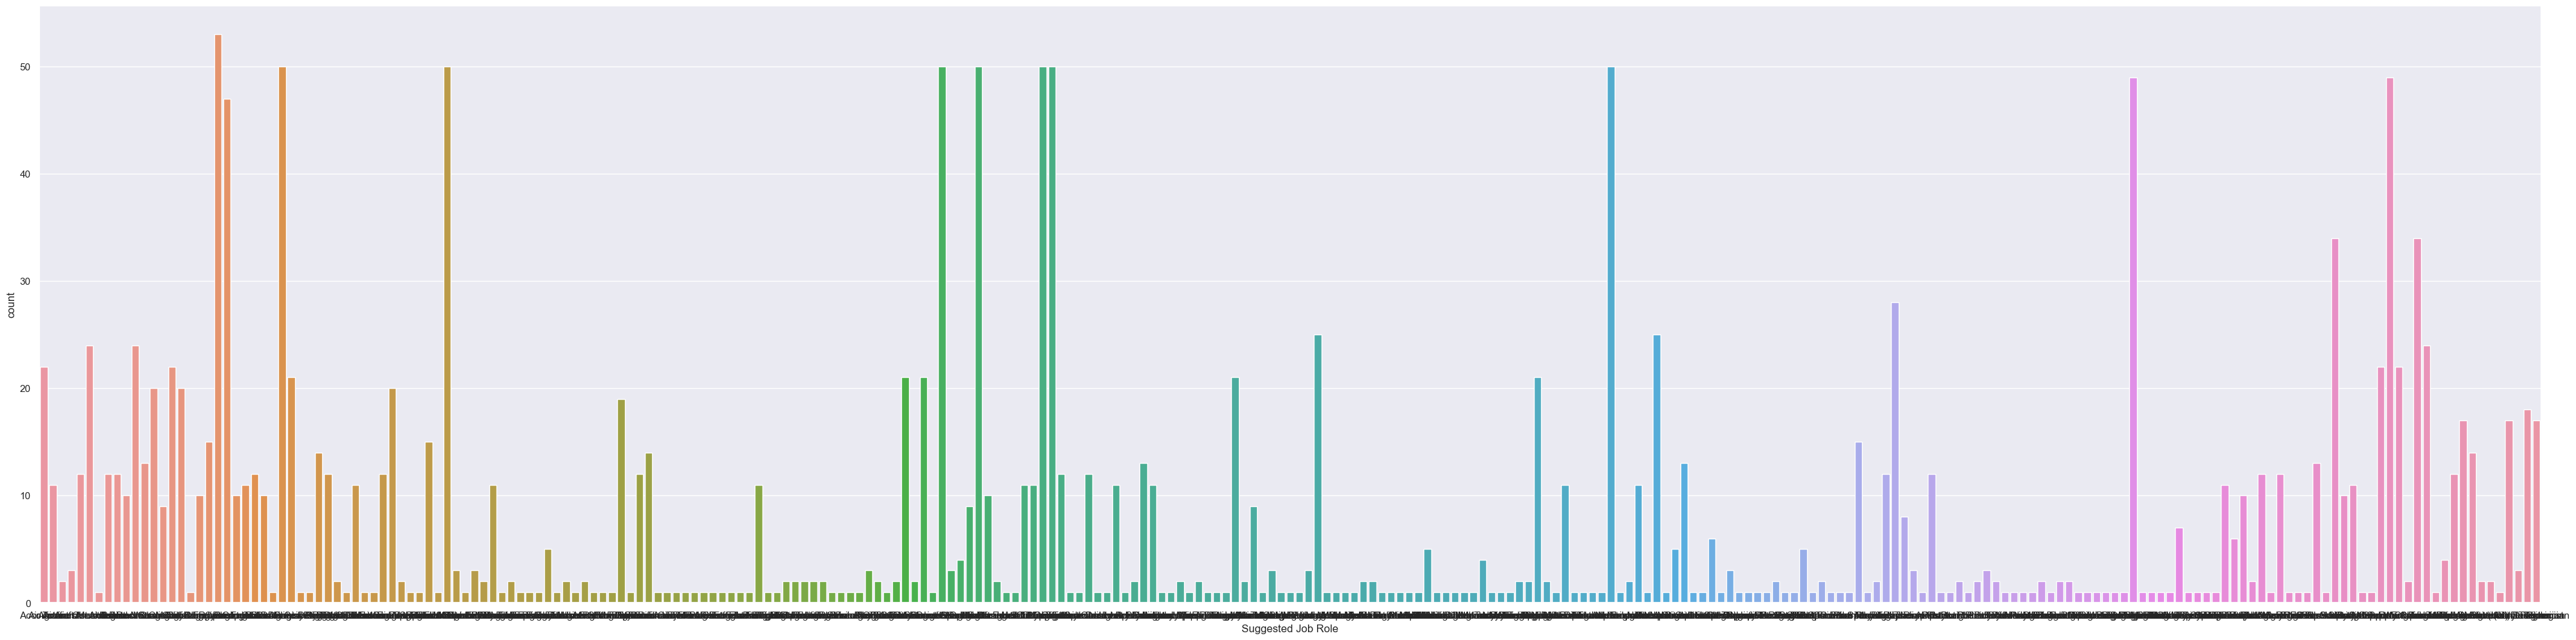

In [11]:
#checking data for the balancing
sns.set(rc={'figure.figsize':(50,12)})
sns.countplot(x = df["Suggested Job Role"])

In [12]:
print(df["Suggested Job Role"].value_counts())


Suggested Job Role
Cloud Engineer             53
Ethical Hacker             50
General Manager            50
Graphic Designer           50
IOT Engineer               50
                           ..
Materials Scientist         1
Mechanic                    1
Media Ethics Consultant     1
Media Planner               1
Marine Engineer             1
Name: count, Length: 273, dtype: int64


In [13]:
#visuallization of categorical veriables
print(df["Interested Subjects"].value_counts())

Interested Subjects
Marketing            90
Finance              61
Medicine             54
Cloud Computing      53
Economics            51
                     ..
Forestry              1
Politics              1
Public Policy         1
Political Science     1
Film/Theater          1
Name: count, Length: 184, dtype: int64


Index(['Interested Subjects', 'count'], dtype='object')


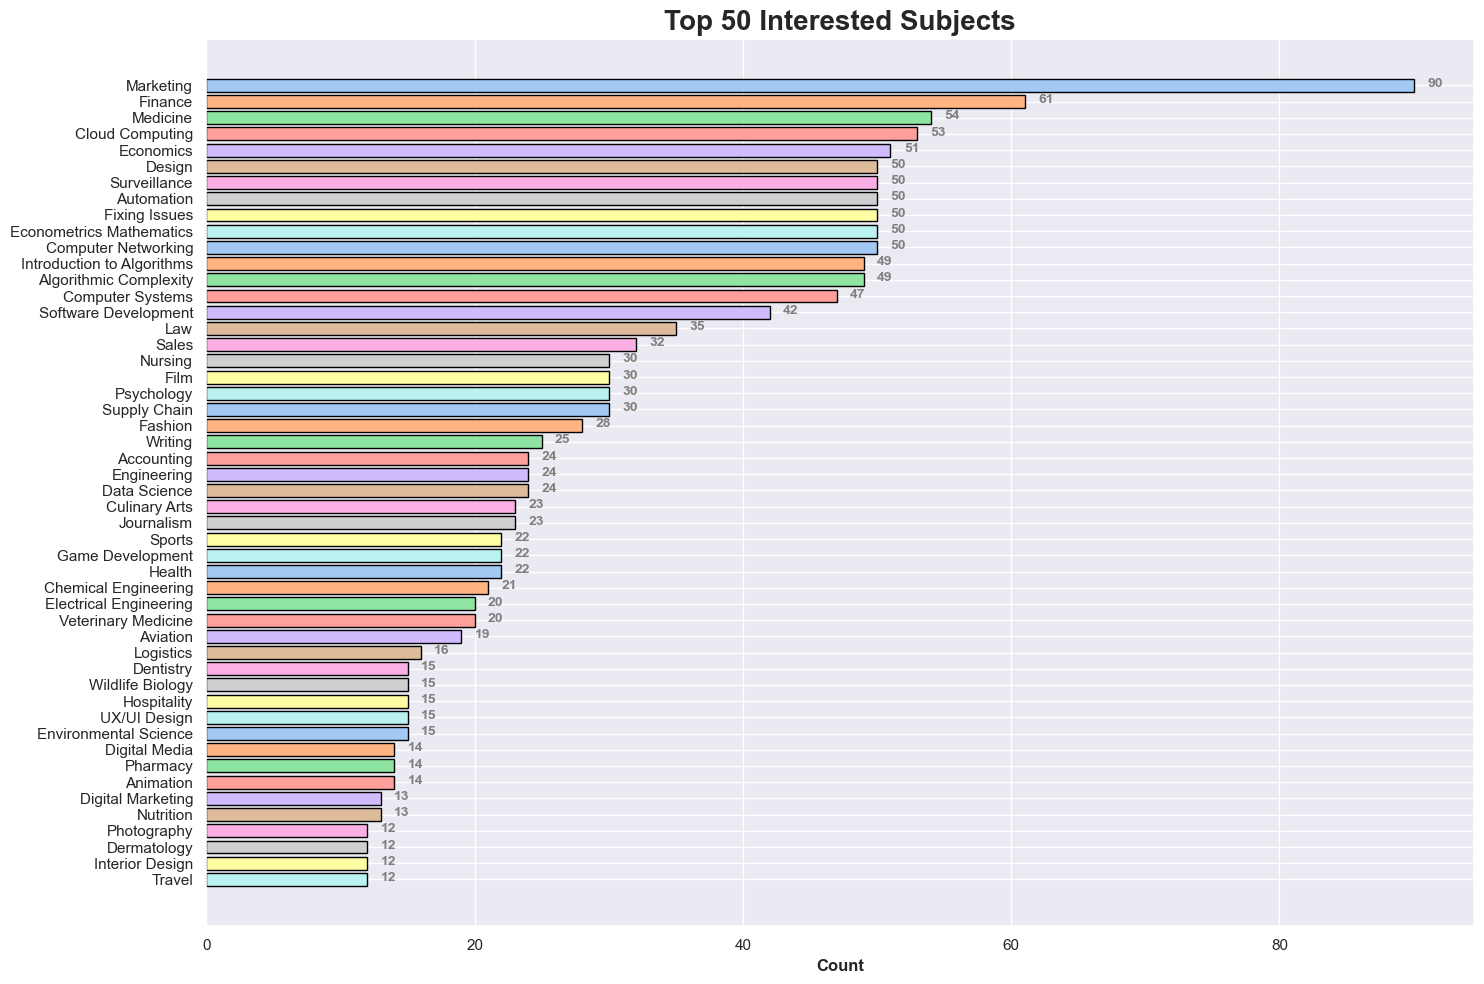

In [14]:
# Reset index and inspect columns
title_cnt = df["Interested Subjects"].value_counts().sort_values(ascending=False).head(50).reset_index()
print(title_cnt.columns)  # Ensure the column names are correct

# Access columns dynamically
fig, ax = plt.subplots(figsize=(15, 10))
mn = ax.barh(title_cnt.iloc[:, 0], title_cnt.iloc[:, 1], edgecolor='black',
             color=sns.color_palette('pastel', len(title_cnt)))

# Visualization adjustments (same as before)
ax.invert_yaxis()
ax.set_title('Top 50 Interested Subjects', weight='bold', fontsize=20)
ax.set_xlabel('Count', weight='bold')
for i in ax.patches:
    ax.text(i.get_width() + 1, i.get_y() + 0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.tight_layout()
plt.show()

In [15]:
print(df["Suggested Job Role"].value_counts())

Suggested Job Role
Cloud Engineer             53
Ethical Hacker             50
General Manager            50
Graphic Designer           50
IOT Engineer               50
                           ..
Materials Scientist         1
Mechanic                    1
Media Ethics Consultant     1
Media Planner               1
Marine Engineer             1
Name: count, Length: 273, dtype: int64


Index(['Suggested Job Role', 'count'], dtype='object')


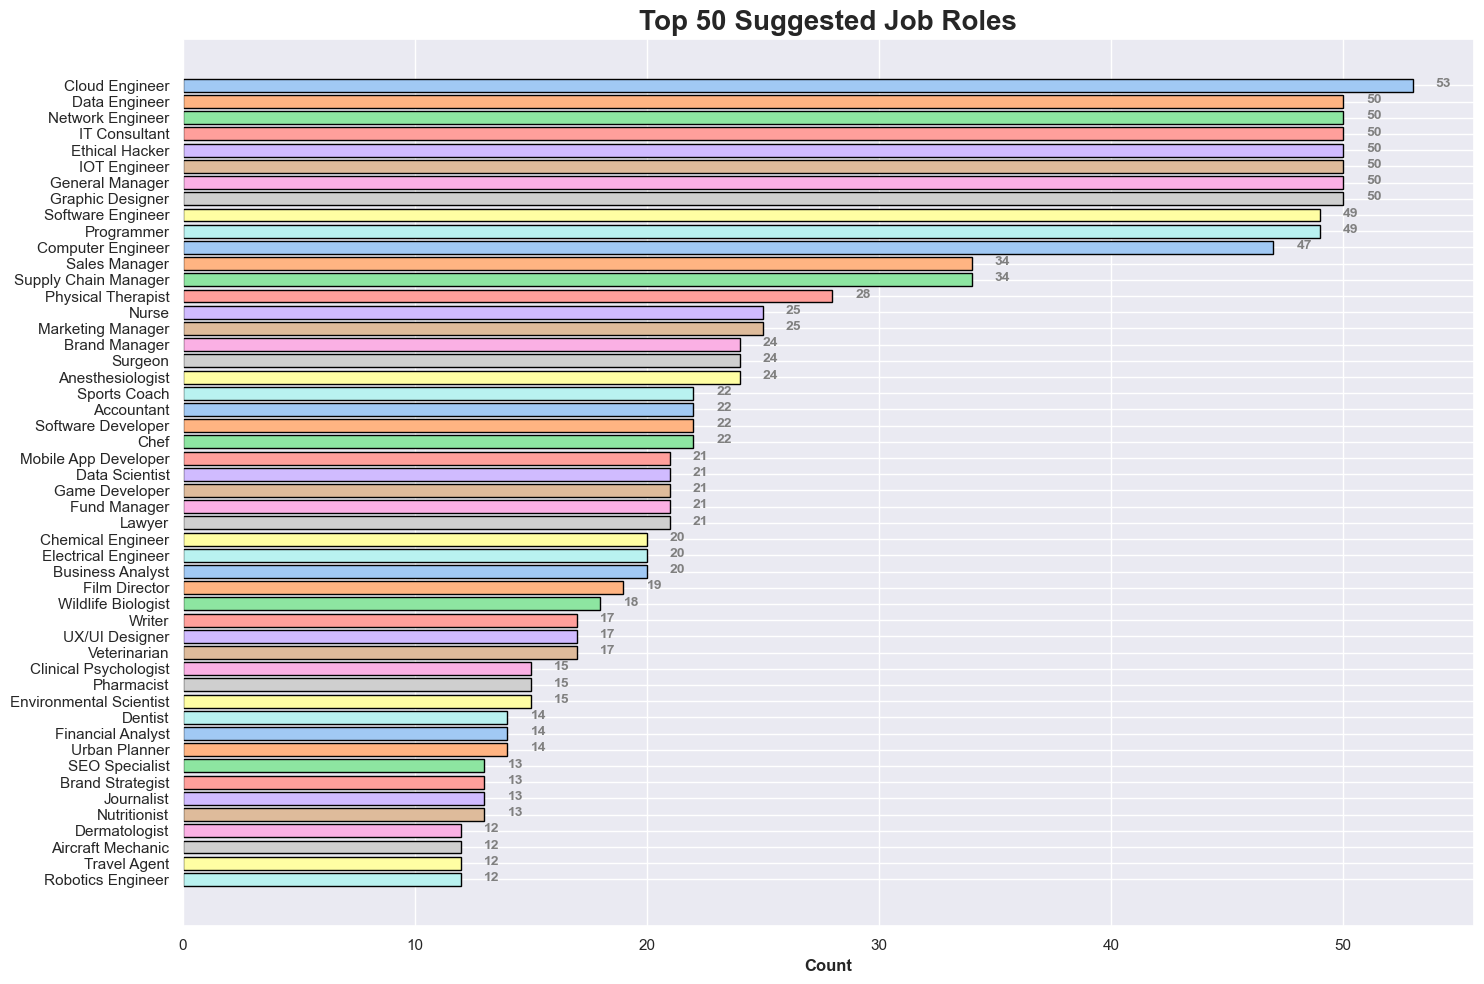

In [16]:
# Reset index and inspect columns
title_cnt = df["Suggested Job Role"].value_counts().sort_values(ascending=False).head(50).reset_index()
print(title_cnt.columns)  # Ensure the column names are correct

# Access columns dynamically
fig, ax = plt.subplots(figsize=(15, 10))
mn = ax.barh(title_cnt.iloc[:, 0], title_cnt.iloc[:, 1], edgecolor='black',
             color=sns.color_palette('pastel', len(title_cnt)))

# Visualization adjustments (same as before)
ax.invert_yaxis()
ax.set_title('Top 50 Suggested Job Roles', weight='bold', fontsize=20)
ax.set_xlabel('Count', weight='bold')
for i in ax.patches:
    ax.text(i.get_width() + 1, i.get_y() + 0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.tight_layout()
plt.show()

In [17]:
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['Area That Align with Your Mission', 'Skills', 'Interested Subjects', 'Hobbies', 'Fulfilling Activity', 'Strengths', 'Suggested Job Role']


In [18]:
category_cols = df[['Area That Align with Your Mission', 'Skills', 'Interested Subjects', 'Hobbies', 'Fulfilling Activity', 'Strengths', 'Suggested Job Role']]
for i in category_cols:
    df[i] = df[i].astype('category')
    df[i + "_code"] = df[i].cat.codes

print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())




List of Categorical features: 
 []


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Percentage at School                      1953 non-null   int64   
 1   Percentage at College                     1953 non-null   int64   
 2   Hours Studing per day                     1953 non-null   int64   
 3   Interested in extracurricular activites?  1953 non-null   int64   
 4   Self-learning capability?                 1953 non-null   int64   
 5   Are you Introvert?                        1953 non-null   int64   
 6   Area That Align with Your Mission         1953 non-null   category
 7   Skills                                    1953 non-null   category
 8   Interested Subjects                       1953 non-null   category
 9   Hobbies                                   1953 non-null   category
 10  Fulfilling Activity     

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib
import os

# Sample dataset (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# List of categorical columns
categorical_columns = ['Area That Align with Your Mission', 'Skills', 'Interested Subjects', 'Hobbies', 'Fulfilling Activity', 'Strengths', 'Suggested Job Role']

# Initialize a dictionary to store the encoders for each column
encoders = {}

# Ensure the 'encoders' directory exists
os.makedirs('encoders', exist_ok=True)

# Apply label encoding to each categorical column
for col in categorical_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder  # Save the encoder for later use (e.g., for future predictions)
    
    # Save the encoder for each column separately
    joblib.dump(encoder, f'encoders/{col}_encoder.pkl')

# If you want to see the changes
print(df.head())




   Percentage at School  Percentage at College  Hours Studing per day  \
0                    67                     76                      7   
1                    80                     70                     11   
2                    66                     74                      9   
3                    72                     78                     12   
4                    75                     68                     10   

   Interested in extracurricular activites?  Self-learning capability?  \
0                                         1                          4   
1                                         1                          5   
2                                         1                          3   
3                                         0                          4   
4                                         1                          5   

   Are you Introvert?  Area That Align with Your Mission  Skills  \
0                   0                           

In [21]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())

List of Numerical features: 
 ['Percentage at School', 'Percentage at College', 'Hours Studing per day', 'Interested in extracurricular activites?', 'Self-learning capability?', 'Are you Introvert?', 'Area That Align with Your Mission', 'Skills', 'Interested Subjects', 'Hobbies', 'Fulfilling Activity', 'Strengths', 'Suggested Job Role', 'Area That Align with Your Mission_code', 'Skills_code', 'Interested Subjects_code', 'Hobbies_code', 'Fulfilling Activity_code', 'Strengths_code', 'Suggested Job Role_code']


In [22]:
#ml model
feed = df[['Percentage at School', 'Percentage at College',
       'Hours Studing per day', 'Interested in extracurricular activites?',
       'Self-learning capability?', 'Are you Introvert?',
       'Area That Align with Your Mission', 'Skills', 'Interested Subjects',
       'Hobbies', 'Fulfilling Activity', 'Strengths', 'Suggested Job Role']]

# Taking all independent variable columns
df_train_x = feed.drop('Suggested Job Role',axis = 1)

# Target variable column
df_train_y = feed['Suggested Job Role']

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)


Decisiontree

In [23]:
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*100)

confusion matrics= [[0 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]
  
accuracy= 72.63427109974424


SVM algo

In [24]:
import sklearn
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
svm_y_pred = clf.predict(x_test)
svm_cm = confusion_matrix(y_test,svm_y_pred)
svm_accuracy = accuracy_score(y_test,svm_y_pred)
print("confusion matrics=",svm_cm)
print("  ")
print("accuracy=",svm_accuracy*100)

confusion matrics= [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
  
accuracy= 6.138107416879795



Random forest Ml Algorithm

In [25]:
rf = RandomForestClassifier(random_state = 10)
rf.fit(x_train, y_train)
rfc_y_pred = rf.predict(x_test)
rfc_cm = confusion_matrix(y_test,rfc_y_pred)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred)
print("confusion matrics=",rfc_cm)
print("  ")
print("accuracy=",rfc_accuracy*100)

confusion matrics= [[0 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 4]]
  
accuracy= 61.63682864450127


In [26]:
# XG boost
# classification using xgboost
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

In [27]:
x_train.shape

(1562, 12)

In [28]:
# converting values of training and testing data into int64 datatype
x_train=pd.to_numeric(x_train.values.flatten())

In [29]:
x_train=x_train.reshape((1562,12))

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(x_train, y_train)

# Make predictions on test set
nb_y_pred = nb.predict(x_test)

# Calculate confusion matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, nb_y_pred)

# Print results
print("Confusion Matrix =", nb_cm)
print("  ")
print("Accuracy =", nb_accuracy * 100)

# If you want to compare both models
print("\nModel Comparison:")
print(f"Random Forest Accuracy: {rfc_accuracy * 100:.2f}%")
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")

Confusion Matrix = [[0 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 1]]
  
Accuracy = 64.70588235294117

Model Comparison:
Random Forest Accuracy: 61.64%
Naive Bayes Accuracy: 64.71%


c:\Users\Sakshi\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [31]:
import joblib
# Assuming model is your trained machine learning model
joblib.dump(nb, 'DecisionTreeClassifier.pkl')

['DecisionTreeClassifier.pkl']

In [32]:
loaded_model = joblib.load('DecisionTreeClassifier.pkl')
print("Model loaded successfully!")

Model loaded successfully!


In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('final_utf8.csv')

# Fit LabelEncoder on the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df["Suggested Job Role"])

# Retrieve mapping
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

# Print the mapping
print("Mapping of Numbers to Job Roles:")
for num, role in label_mapping.items():
    print(f"{num}: {role}")


Mapping of Numbers to Job Roles:
0: Accountant
1: Actor
2: Agronomist
3: Air Traffic Controller
4: Aircraft Mechanic
5: Anesthesiologist
6: Anesthetist
7: Animator
8: Architect
9: Astronomer
10: Brand Manager
11: Brand Strategist
12: Business Analyst
13: Cardiologist
14: Chef
15: Chemical Engineer
16: Chemical Engineer
17: Choreographer
18: Clinical Psychologist
19: Cloud Engineer
20: Computer Engineer
21: Content Writer
22: Copywriter
23: Costume Designer
24: Counselor
25: Data Analyst
26: Data Engineer
27: Data Scientist
28: Delivery Driver
29: Dental Hygienist
30: Dentist
31: Dermatologist
32: Detective
33: Digital Artist
34: Digital Content Creator
35: Digital Forensics Expert
36: Digital Marketing Manager
37: Digital Marketing Specialist
38: Electrical Engineer
39: Environmental Consultant
40: Environmental Educator
41: Environmental Health Specialist
42: Environmental Scientist
43: Epidemiologist
44: Ethical Hacker
45: Event Coordinator
46: Event Marketing Manager
47: Event Plann

In [34]:
# Example input data for prediction (single sample)
new_data = np.array([
    95,  # Percentage at School
    85,  # Percentage at College
    5,   # Hours Studying per day
    4,   # Interested in extracurricular activities? (Yes)
    1,   # Self-learning capability (Excellent)
    0,   # Are you Introvert? (No)
    1297,   # Area That Align with Your Mission_code (Community Service)
    714,   # Skills_code (Empathy)
    32, # Interested Subjects_code (Social Studies)
    362, # Hobbies_code (Volunteering)
    117, # Fulfilling Activity_code (Helping Others)
    15  # Strengths_code (Empathetic)
])

# Reshape the data to make it a 2D array (1 sample, multiple features)
new_data = new_data.reshape(1, -1)


# Load the pre-trained GaussianNB model
loaded_model = joblib.load('DecisionTreeClassifier.pkl')

# Predict the numerical label
predicted_label = loaded_model.predict(new_data)[0]

# Map the predicted numerical label to the job role
predicted_job_role = label_mapping.get(predicted_label, "Unknown Role")
 
# Print the predicted job role
print(f"Predicted Suggested Job Role: {predicted_job_role}")
print(f"Corresponding Numerical Label: {predicted_label}")

Predicted Suggested Job Role: UX/UI Designer
Corresponding Numerical Label: 264
